# Combinando CHIP-seq con DNase-seq

En este ejemplo se va a ver como combinar CHIP-seq con DNase-seq (sin mostrar los mapas de calor individuales ya que se pueden ver en el ejemplo 1 y 2).
Esto es importante porque sirve para ver si donde existe unión del ADN con las proteínas (CHIP-seq) existe una accesibilidad a la cromatina (DNase-seq).

Se comineza importando las librerías necesarias:


In [1]:
import Pyntegrate
import matplotlib.pyplot as plt
import numpy as np

Una vez se tienen las librerías importadas que vamos a necesitar, se podrían guardar en variables los datos de CHIP-seq y DNase-seq.
Estos, tienen que ser cargados con los archivos de transcripciones y también indicar el genoma que se quiere analizar y la longitud de los subintervalos (bins)

In [2]:
bins = 100

features, atac_signal, tsses,tsses_1kb = Pyntegrate.SeqSignalAnalysis.generate_array_simple_signal(dbPath='/home/jerry/Documentos/Python3.10/prueba/data/gencode.vM25.annotation.gtf.db',
                                                                                                   filePath='/home/jerry/Documentos/Python3.10/prueba/mosimData/SampleDataDNase-seq-5000.bw',
                                                                                                   extensionFile='bigwig',
                                                                                                   genome='mm10',
                                                                                                   bins=bins)

features, chip_signal, tsses,tsses_1kb = Pyntegrate.SeqSignalAnalysis.generate_array_simple_signal(dbPath='/home/jerry/Documentos/Python3.10/prueba/data/gencode.vM25.annotation.gtf.db',
                                                                                                   filePath='/home/jerry/Documentos/Python3.10/prueba/mosimData/SampleDataChip-seq-5000.bw',
                                                                                                   extensionFile='bigwig',
                                                                                                   genome='mm10',
                                                                                                   bins=bins)

Una vez se tienen cargados los valores de las señales de los arrays, nos tenemos que quedar con aquellos genes que sean coincidentes entre estas señales. Para ello, Pyntegrate tiene una función que puede ser de utilidad y realizarse de forma sencilla:

In [4]:
atac_signal_good , chip_signal_good = Pyntegrate.SeqSignalAnalysis.chip_genes_not_used_with_atac(atac_signal,chip_signal,by="id")

 Termine lo alrgo


Una vez se tienen los genes coincidentes en cada una de las señales, se tienen que extraer los valores de las señales y porceder a realizar la gráfica.

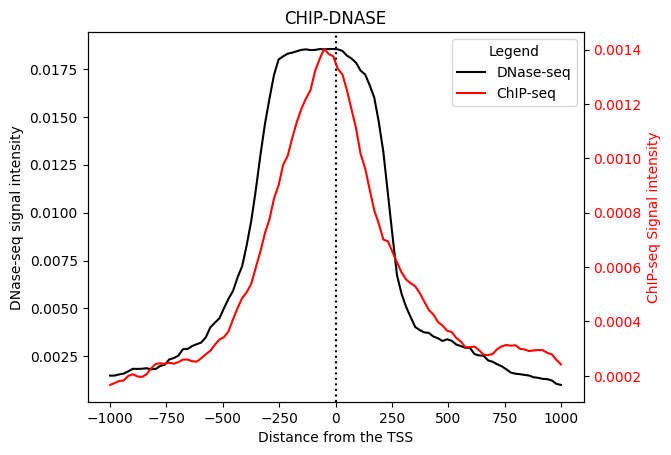

In [5]:
normalized_subtracted_atac = Pyntegrate.SeqSignalAnalysis.value_array_simple(atac_signal_good)
normalized_subtracted_chip = Pyntegrate.SeqSignalAnalysis.value_array_simple(chip_signal_good)

x=np.linspace(-1000,1000,bins)
fig = Pyntegrate.SeqSignalAnalysis.chip_dnase(normalized_subtracted_chip, normalized_subtracted_atac,xAxes=x,name="CHIP-DNASE")

En esta gráfica se puede observar dos líneas.
La línea negra, son los valores de DNase-seq, cuya escala está a la izquierda. 
La línea roja, son los valores de CHIP-seq, cuya escala está a la derecha.
Y en el eje x se indica la distancia al TSS. 
En esta gráfica se puede observar que cuando la distancia con los TSS es 0, existe una alta ADN a las proteínas y también existe una accesibilidad a la cromatina